## Import Libraries

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GroupShuffleSplit, TimeSeriesSplit
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import AR, ARIMA, ARMA

### Read in cleaned_etf

In [137]:
etf = pd.read_csv('clean_etf.csv')

In [138]:
etf.tail()

,date,iyr_close,eem_close,agg_close,emb_close,bsv_close,iau_close,ifeu_close,ijh_close,slv_close,ijr_close,ivv_close,ivv_close_shft
2523,2007-12-27,66.48,50.52,100.60,101.17,76.67,8.16,47.06,85.91,14.53,32.80,148.13,147.60
2524,2007-12-26,68.58,51.71,100.46,101.41,76.53,8.17,47.03,87.54,14.60,33.74,150.67,148.13
2525,2007-12-21,67.89,51.24,100.74,101.15,76.96,8.02,46.55,87.05,14.21,33.41,149.04,150.67
2526,2007-12-20,66.75,49.74,101.18,101.26,77.25,7.88,45.20,85.88,14.09,32.73,147.10,149.04
2527,2007-12-19,66.50,49.47,101.27,101.22,77.13,7.94,45.18,84.61,13.99,32.27,146.07,147.10


### Change the date to datetime dtype and set to index (when I created the csv and the read it back in it changed the original formatting from datetime and index to object and column 1...?)

In [139]:
etf['date'] = pd.to_datetime(etf['date']) # creating datetime dtype for date 

In [140]:
etf.set_index('date', inplace = True) # setting date to "index" - take a look a next cell

In [141]:
etf.head()

,iyr_close,eem_close,agg_close,emb_close,bsv_close,iau_close,ifeu_close,ijh_close,slv_close,ijr_close,ivv_close,ivv_close_shft
date,,,,,,,,,,,,
2018-09-21,81.91,43.23,105.46,107.24,77.99,11.49,39.68,204.08,13.44,88.44,295.36,294.47
2018-09-20,81.95,43.03,105.38,107.01,77.96,11.57,40.09,204.65,13.45,88.93,295.76,295.36
2018-09-19,81.14,42.56,105.24,106.41,77.96,11.53,39.61,203.14,13.40,88.17,293.28,295.76
2018-09-18,82.23,41.98,105.44,106.03,77.97,11.49,39.96,203.80,13.31,88.73,293.07,293.28
2018-09-14,82.23,41.96,105.67,106.69,78.02,11.46,39.68,204.87,13.23,89.47,292.91,293.07


In [142]:
etf.head()

,iyr_close,eem_close,agg_close,emb_close,bsv_close,iau_close,ifeu_close,ijh_close,slv_close,ijr_close,ivv_close,ivv_close_shft
date,,,,,,,,,,,,
2018-09-21,81.91,43.23,105.46,107.24,77.99,11.49,39.68,204.08,13.44,88.44,295.36,294.47
2018-09-20,81.95,43.03,105.38,107.01,77.96,11.57,40.09,204.65,13.45,88.93,295.76,295.36
2018-09-19,81.14,42.56,105.24,106.41,77.96,11.53,39.61,203.14,13.40,88.17,293.28,295.76
2018-09-18,82.23,41.98,105.44,106.03,77.97,11.49,39.96,203.80,13.31,88.73,293.07,293.28
2018-09-14,82.23,41.96,105.67,106.69,78.02,11.46,39.68,204.87,13.23,89.47,292.91,293.07


### Create 90% of the data set

In [143]:
etf_90 = etf.tail(round(etf.shape[0] *.90))

In [144]:
etf_90.head()

,iyr_close,eem_close,agg_close,emb_close,bsv_close,iau_close,ifeu_close,ijh_close,slv_close,ijr_close,ivv_close,ivv_close_shft
date,,,,,,,,,,,,
2017-09-18,81.64,45.75,109.86,116.83,79.93,12.57,39.23,176.09,16.27,71.34,252.71,252.95
2017-09-15,82.08,45.59,109.91,117.06,79.95,12.70,39.51,175.24,16.62,70.78,252.14,252.71
2017-09-14,81.74,45.32,109.93,116.90,80.00,12.76,39.22,174.69,16.77,70.40,251.82,252.14
2017-09-13,81.24,45.20,109.87,116.82,80.00,12.71,39.02,174.77,16.76,70.43,251.91,251.82
2017-09-12,81.54,45.44,109.98,116.82,80.06,12.80,39.48,174.96,16.89,70.20,251.80,251.91


### Setup Correlation matrix

In [145]:
corr = etf_90.corr()

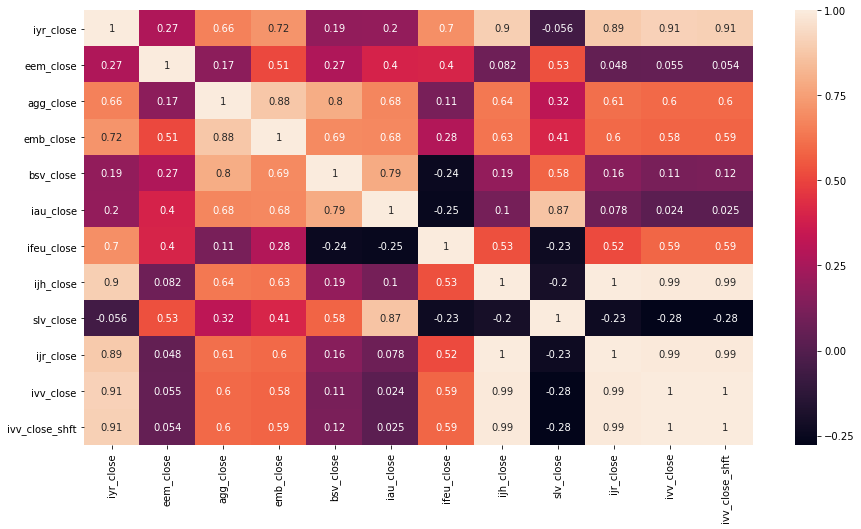

In [146]:
fig, ax = plt.subplots(figsize = (15,8))

sns.heatmap(corr, annot = True)


# fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

### Setup features and target

In [147]:
X = etf_90.drop(etf_90[["ivv_close_shft"]],axis =1)
y = etf_90["ivv_close_shft"]

In [148]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [149]:
etf_90.shape

(2275, 12)

In [150]:
# scaling the X data
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

### Run a series of regressor models

In [151]:
# Random forest Regressor
rfr = RandomForestRegressor()
modelrfr = rfr.fit(Xs_train,y_train)
print("Random Forrest score: ", modelrfr.score(Xs_test,y_test))

# Bagging Regressor
bag = BaggingRegressor()
modelbag = bag.fit(Xs_train, y_train)
print("Bagging Regressor score: ", modelbag.score(Xs_test,y_test))

# Extra Trees Regressor
xrt = ExtraTreesRegressor()
modelxrt = xrt.fit(Xs_train, y_train)
print("Estra Trees score: ", modelxrt.score(Xs_test, y_test))

# Gradient Boosting Regressor
grd = GradientBoostingRegressor()
modelgrd = grd.fit(Xs_train, y_train)
print("Gradient Boosting score: ", modelgrd.score(Xs_test, y_test))

# SVM Regressor
svm = SVR()
modelsvm = svm.fit(Xs_train,y_train)
print("Support Vector Machine Score: ", modelsvm.score(Xs_test,y_test))

# XGBoost Regressor
xgb = XGBRegressor(booster = "gblinear")
modelxgb = xgb.fit(Xs_train,y_train)
print("XGBoost score: ", modelxgb.score(Xs_test,y_test))

# ADA Boost Regressor
ada = AdaBoostRegressor(base_estimator=LinearRegression())
modelada = ada.fit(Xs_train,y_train)
print("AdaBoost Regressor score: ", modelada.score(Xs_test,y_test))


Random Forrest score:  0.998489052589121
Bagging Regressor score:  0.9984783206151381
Estra Trees score:  0.9984458082127345
Gradient Boosting score:  0.9985613957320341
Support Vector Machine Score:  0.9895850906908303
XGBoost score:  0.9546028227492991
AdaBoost Regressor score:  0.9986481519965014


In [152]:
svr = SVR()
ada2 = AdaBoostRegressor(n_estimators=550, base_estimator=(SVR(kernel = 'linear')))
modelada2 = ada2.fit(Xs_train,y_train)
print("AdaBoost 2 Regressor score: ", modelada2.score(Xs_test,y_test))

AdaBoost 2 Regressor score:  0.9983834765606152


### Take a look at the predictions based off Adaboost model with a linear regression base model for the test set

In [153]:
y_hat = modelada.predict(Xs_test)

In [154]:
y_test['y_hat'] = y_hat

In [155]:
y_test.head()

date
2015-11-20    210.22
2016-05-04    206.01
2017-07-31    248.99
2009-06-10     95.08
2014-08-25    201.65
Name: ivv_close_shft, dtype: object

### Bring in the 10% of the data that was held away to test model on.

In [156]:
etf_10 = etf.head(etf.shape[0] - etf_90.shape[0])

In [157]:
X1 = etf_10.drop(etf[["ivv_close_shft"]], axis =1)
y1 = etf_10[['ivv_close_shft']]

In [158]:
X1s = ss.transform(X1)

In [159]:
modelada.score(X1s, y1)

0.9568125822426385

### Create new predictions based on test set that is held away

In [160]:
y_hat = modelada.predict(X1s)
y1['y_hat'] = y_hat

/Users/preilley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Creating a dataframe to use in graphs below

In [161]:
y1['ivv_close'] = X1['ivv_close']

/Users/preilley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
y1["ivv_shft for graph"]= y1[['ivv_close']].shift(-1)

/Users/preilley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [163]:
y1.head()

,ivv_close_shft,y_hat,ivv_close,ivv_shft for graph
date,,,,
2018-09-21,294.47,294.631957,295.36,295.76
2018-09-20,295.36,295.050812,295.76,293.28
2018-09-19,295.76,292.595793,293.28,293.07
2018-09-18,293.28,292.383064,293.07,292.91
2018-09-14,293.07,292.203143,292.91,292.92


In [164]:
y1['res_close'] = y1['ivv_close']- y1['y_hat']

/Users/preilley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


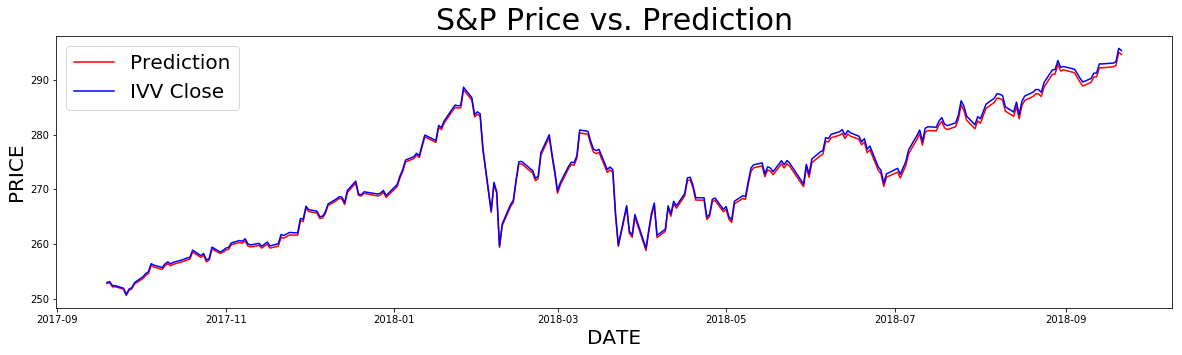

In [165]:
plt.figure(figsize = (20,5))
plt.plot(y1[['y_hat']], 'r')
plt.plot(y1[['ivv_close']], 'b')
plt.title('S&P Price vs. Prediction', fontsize=30)
plt.xlabel('DATE', fontsize=20)
plt.ylabel('PRICE', fontsize=20)
plt.legend(['Prediction', 'IVV Close'],prop={'size': 20})

Text(0, 0.5, 'Residual Price')

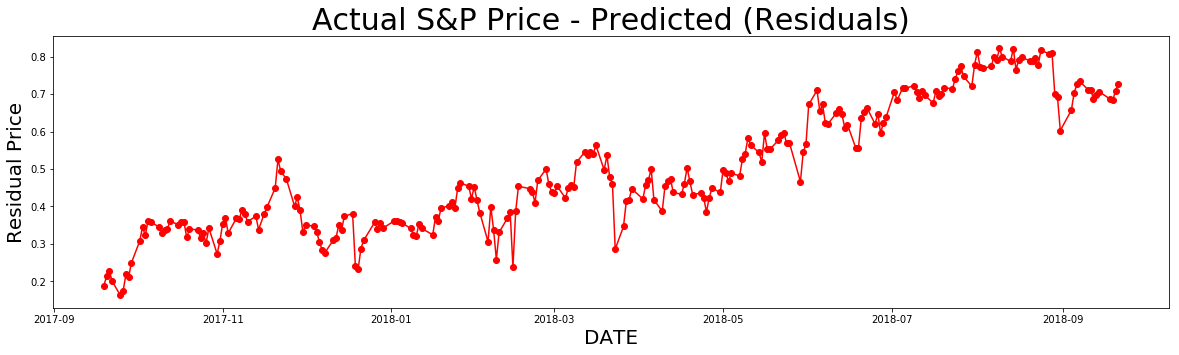

In [170]:
plt.figure(figsize = (20,5))
plt.plot(y1['res_close'], 'r-o')
plt.title('Actual S&P Price - Predicted (Residuals)', fontsize=30)
plt.xlabel('DATE', fontsize=20)
plt.ylabel('Residual Price', fontsize=20) 